In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
folder = 'alternative/'
std = 'StandardTestTrain_Summary.csv'
amine = 'LeaveOneOut_Summary.csv'
experiment_types = ['knn1']

In [76]:
plt.rcParams["figure.figsize"] = (10,6)

def plot_bar(data, title):
    fig, ax = plt.subplots()
    col = 'precision_positive mean'
    ax = sns.barplot(x="data_index", y=col, data=data, palette="Blues_d")
    plt.xticks(rotation=45)
    ax.set(xlabel='', ylabel='Precisión')
    ax.set_ylim([0.0,1])
    plt.title(title)
    plt.savefig(folder+title+'.jpg', bbox_inches='tight')
    

In [77]:
from pathlib import Path

full_plot_path = folder + 'plots/'
Path(full_plot_path).mkdir(parents=True, exist_ok=True)

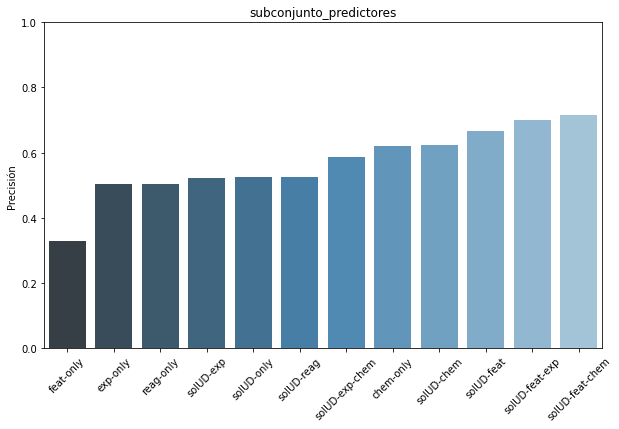

In [78]:
for experiment in experiment_types:
    df = pd.read_csv(folder + experiment +'/' + std).sort_values('precision_positive mean')    
    plot_bar(df,'subconjunto_predictores')


In [264]:
folder = 'alternative/cant_exp_seed/'
std = 'StandardTestTrain_Summary.csv'
std_full = 'StandardTestTrain_Full.csv'
amine = 'LeaveOneOut_Summary.csv'
experiment_types = ['knn1', 'gbc1']

In [265]:
df = pd.read_csv(folder + 'knn1' +'/' + std)

In [266]:
selected_data_index = ['feat-only', 'chem-only', 'solUD-chem', 'solUD-feat']

In [267]:
data = df.loc[df['data_index'].isin(selected_data_index)]

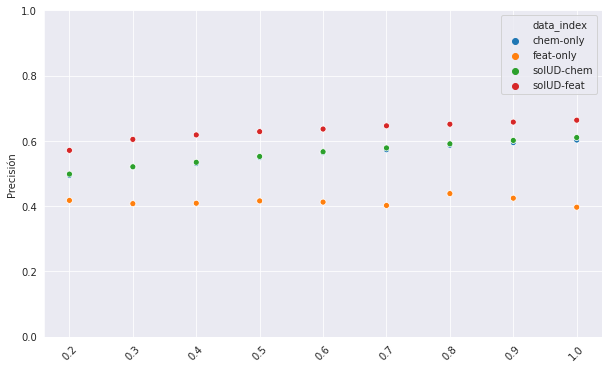

In [268]:
fig, ax = plt.subplots()
col = 'precision_positive mean'
ax = sns.scatterplot(data=data, x='sample_fraction', y=col, hue='data_index')
plt.xticks(rotation=45)
ax.set(xlabel='', ylabel='Precisión')
ax.set_ylim([0.0,1])
plt.savefig(folder+'exp_cant'+'.jpg', bbox_inches='tight')


In [305]:
plt.rcParams["figure.figsize"] = (10,6)
porcentajes = [str(x) for x in range (10,110,10)]

sns.set_style('darkgrid')
def plot_line(data, title):    
    fig, ax = plt.subplots()
    col = 'precision_positive mean'
    ax = sns.scatterplot(data=data, x='sample_fraction', y=col, hue='Predictores')
    plt.xticks(rotation=45)
    #ax.set(xlabel='', ylabel='')
    ax.set_xlabel("Cantidad de experimentos (%)",fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_ylabel("Precisión",fontsize=13)
    ax.set_xticklabels(porcentajes)
    ax.set_ylim([0.2,0.9])
    plt.legend(fontsize='12', title_fontsize='12')
    ax.axes.set_title(title, fontsize=14)
    #fig.add_legend(hue_order = ['ChemQ', 'PropFQ', 'RxnChemQ', 'RxnPropFQ', 'Rxn'])
    #plt.legend(title='Predictores', loc='lower right'), #labels=['ChemQ', 'PropFQ', 'RxnChemQ', 'RxnPropFQ', 'Rxn'])

    plt.savefig(folder+title+'.jpg', bbox_inches='tight')
    

In [306]:
def exp1(experiment, title):
    df = pd.read_csv(folder + experiment +'/' + std)
    selected_data_index = ['feat-only', 'solUD-chem', 'solUD-feat','solUD-only']
    data = df.loc[df['data_index'].isin(selected_data_index)]
    di = {'feat-only': 'PropFQ', 
          'chem-only': 'ChemQ', 
          'solUD-chem': 'Rxn + ChemQ', 
          'solUD-feat': 'Rxn + PropFQ',
          'solUD-only': 'Rxn'
         }
    data = data.replace({"data_index": di})
    data = data.rename({"data_index": 'Predictores'}, axis='columns')
    
    plot_line(data,'Clasificador: '+' '+ title + '')


/home/belu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


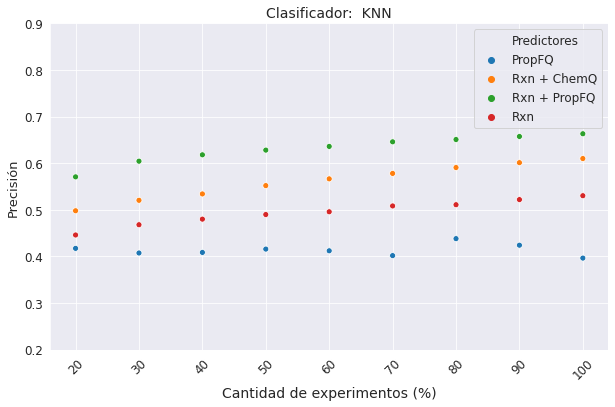

In [307]:
exp1('knn1', 'KNN')

/home/belu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


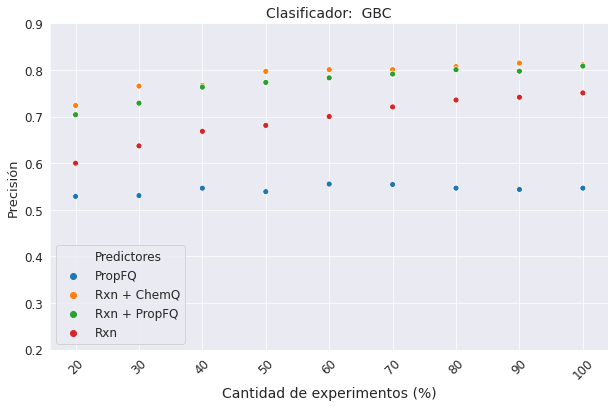

In [308]:
exp1('gbc1', 'GBC')

In [364]:
folder = 'alternative/ensamble/'
std = 'StandardTestTrain_Summary.csv'
std_full = 'StandardTestTrain_Full.csv'
amine = 'LeaveOneOut_Summary.csv'
experiment_types = ['best_features-knn1', 'best_features-gbc1', 'best_features-voting1']

In [419]:
folder = 'alternative/ensamble/'
std = 'StandardTestTrain_Summary.csv'
std_full = 'StandardTestTrain_Full.csv'
amine = 'LeaveOneOut_Summary.csv'
experiment_types = ['knn1', 'gbc1', 'voting1']

In [434]:
dfs = {}
for experiment in experiment_types:
    dfs[experiment] = pd.read_csv(folder + experiment +'/' + std)
    dfs[experiment]['estimator'] = experiment

data = dfs['knn1']
for experiment in ['gbc1', 'voting1']:
    data = data.append(dfs[experiment])
selected_data_index = ['solUD-feat','solUD-only', 'chem-only']

In [435]:
data = data.loc[df['data_index'].isin(selected_data_index)]

In [436]:
data

,data_index,sample_fraction,precision_positive mean,recall_positive mean,f1_positive mean,matthewCoef mean,precision_positive std,recall_positive std,f1_positive std,matthewCoef std,precision_positive min,recall_positive min,f1_positive min,matthewCoef min,precision_positive max,recall_positive max,f1_positive max,matthewCoef max,estimator
0,chem-only,1.0,0.602480,0.616103,0.608791,0.480471,0.027371,0.048161,0.034894,0.046006,0.577670,0.548387,0.562648,0.418158,0.646226,0.658291,0.646226,0.528672,knn1
6,solUD-feat,1.0,0.664172,0.696064,0.678597,0.571894,0.051146,0.020889,0.026183,0.035655,0.588235,0.665094,0.640732,0.521317,0.734375,0.718894,0.709091,0.607632,knn1
9,solUD-only,1.0,0.528092,0.545949,0.535282,0.381863,0.044668,0.022925,0.018687,0.028454,0.449219,0.514151,0.505495,0.333198,0.573684,0.577889,0.560748,0.413060,knn1
0,chem-only,1.0,0.812971,0.510650,0.626439,0.562697,0.032593,0.030713,0.022375,0.022835,0.751773,0.474654,0.607670,0.530157,0.844262,0.551887,0.659155,0.591202,gbc1
6,solUD-feat,1.0,0.816263,0.479064,0.603555,0.544347,0.038685,0.035805,0.037921,0.043038,0.760684,0.421801,0.542683,0.473935,0.866142,0.518868,0.648968,0.597404,gbc1
9,solUD-only,1.0,0.752812,0.250584,0.375780,0.351600,0.056515,0.023701,0.032491,0.041162,0.684211,0.218009,0.332130,0.301391,0.820896,0.278302,0.414035,0.405255,gbc1
0,chem-only,1.0,0.864206,0.378845,0.525463,0.498480,0.033785,0.032210,0.027709,0.016755,0.818182,0.327014,0.482517,0.478809,0.920000,0.405660,0.551282,0.518347,voting1
6,solUD-feat,1.0,0.871412,0.426314,0.572418,0.537509,0.039723,0.028822,0.034115,0.039306,0.814433,0.374408,0.512987,0.470418,0.932039,0.452830,0.609524,0.585845,voting1
9,solUD-only,1.0,0.831208,0.217032,0.343469,0.355606,0.052652,0.022159,0.027778,0.027099,0.761905,0.190244,0.308300,0.326632,0.923077,0.246231,0.378378,0.397452,voting1


In [437]:
di = {'feat-only': 'PropFQ', 
          'chem-only': 'ChemQ', 
          'solUD-chem': 'Rxn + ChemQ', 
          'solUD-feat': 'Rxn + PropFQ',
          'solUD-only': 'Rxn'
         }
da = {
    'knn1': 'KNN', 
    'gbc1': 'GBC', 
    'voting1': 'Ensamble(KNN,GBC)' 
}
data = data.replace({"data_index": di})
data = data.replace({"estimator": da})
data = data.rename({"data_index": 'Predictores'}, axis='columns')
data = data.rename({"estimator": 'Alg-Clasificación'}, axis='columns')

In [438]:
data

,Predictores,sample_fraction,precision_positive mean,recall_positive mean,f1_positive mean,matthewCoef mean,precision_positive std,recall_positive std,f1_positive std,matthewCoef std,precision_positive min,recall_positive min,f1_positive min,matthewCoef min,precision_positive max,recall_positive max,f1_positive max,matthewCoef max,Alg-Clasificación
0,ChemQ,1.0,0.602480,0.616103,0.608791,0.480471,0.027371,0.048161,0.034894,0.046006,0.577670,0.548387,0.562648,0.418158,0.646226,0.658291,0.646226,0.528672,KNN
6,Rxn + PropFQ,1.0,0.664172,0.696064,0.678597,0.571894,0.051146,0.020889,0.026183,0.035655,0.588235,0.665094,0.640732,0.521317,0.734375,0.718894,0.709091,0.607632,KNN
9,Rxn,1.0,0.528092,0.545949,0.535282,0.381863,0.044668,0.022925,0.018687,0.028454,0.449219,0.514151,0.505495,0.333198,0.573684,0.577889,0.560748,0.413060,KNN
0,ChemQ,1.0,0.812971,0.510650,0.626439,0.562697,0.032593,0.030713,0.022375,0.022835,0.751773,0.474654,0.607670,0.530157,0.844262,0.551887,0.659155,0.591202,GBC
6,Rxn + PropFQ,1.0,0.816263,0.479064,0.603555,0.544347,0.038685,0.035805,0.037921,0.043038,0.760684,0.421801,0.542683,0.473935,0.866142,0.518868,0.648968,0.597404,GBC
9,Rxn,1.0,0.752812,0.250584,0.375780,0.351600,0.056515,0.023701,0.032491,0.041162,0.684211,0.218009,0.332130,0.301391,0.820896,0.278302,0.414035,0.405255,GBC
0,ChemQ,1.0,0.864206,0.378845,0.525463,0.498480,0.033785,0.032210,0.027709,0.016755,0.818182,0.327014,0.482517,0.478809,0.920000,0.405660,0.551282,0.518347,"Ensamble(KNN,GBC)"
6,Rxn + PropFQ,1.0,0.871412,0.426314,0.572418,0.537509,0.039723,0.028822,0.034115,0.039306,0.814433,0.374408,0.512987,0.470418,0.932039,0.452830,0.609524,0.585845,"Ensamble(KNN,GBC)"
9,Rxn,1.0,0.831208,0.217032,0.343469,0.355606,0.052652,0.022159,0.027778,0.027099,0.761905,0.190244,0.308300,0.326632,0.923077,0.246231,0.378378,0.397452,"Ensamble(KNN,GBC)"


In [450]:
def plot_cmp_bar(data,col):
    fig, ax = plt.subplots()
    ax = sns.barplot(x="data_index", y=col, data=data, hue='estimator')
    #plt.xticks(rotation=45)
    #ax.set(xlabel='', ylabel='Precisión')
    ax.set_ylim([0.0,1])

    #plt.savefig(folder+'Ensamble'+ col + '.jpg', bbox_inches='tight')



In [472]:
def exp2(data , title):
    fig, ax = plt.subplots()
    ax = sns.barplot(x="Predictores", y='precision_positive mean', data=data, hue='Alg-Clasificación')
    #plt.xticks(rotation=45)
    ax.set(xlabel='Predictores empleados', ylabel='Precisión')
    ax.set_ylim([0.0,1])
    ax.set_xlabel("Predictores empleados en cada modelo",fontsize=26)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.set_ylabel("Precisión",fontsize=24)
    ax.set_ylim([0.2,1.1])
    plt.legend(fontsize='16', title_fontsize='12')
    ax.axes.set_title(title, fontsize=14)
    plt.title(title)
    #plt.savefig(folder+'Ensamble'+ col + '.jpg', bbox_inches='tight')

In [473]:
metrics = set(filter(lambda x:(x.endswith('mean')), set(data.columns)))

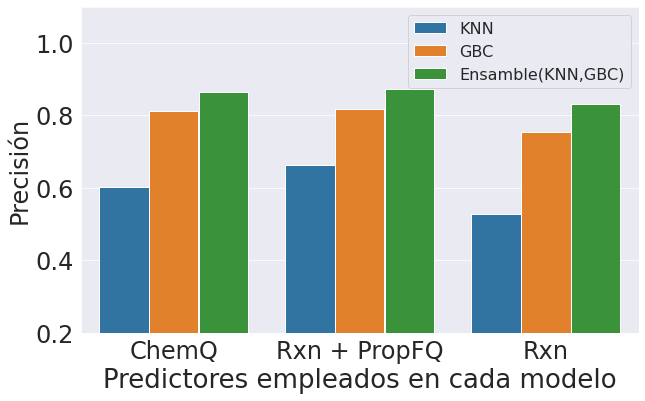

In [474]:
exp2(data, '')

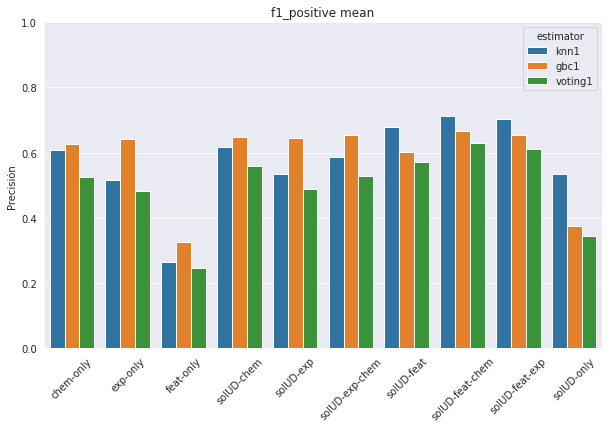

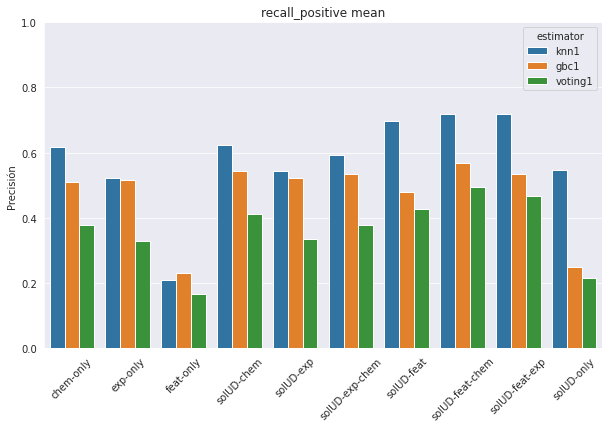

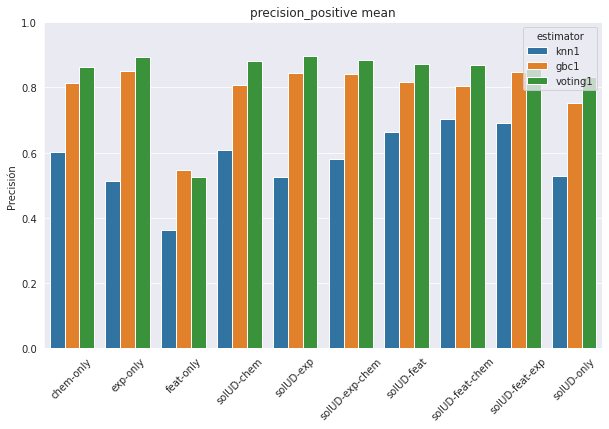

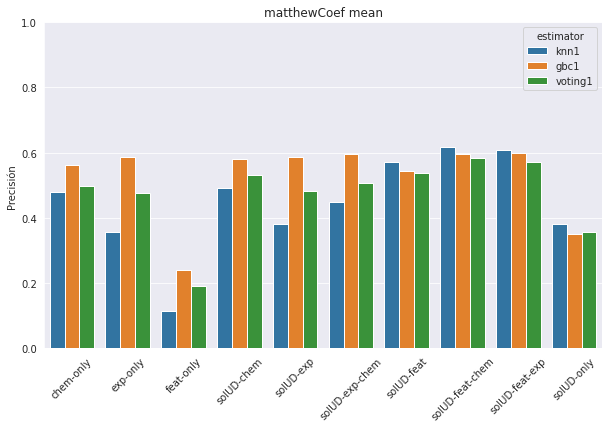

In [194]:
for metric in metrics:
    plot_cmp_bar(data,metric)

In [247]:
folder = 'alternative/features/gbc1/'
std = 'StandardTestTrain_Summary.csv'
std_full = 'StandardTestTrain_Full.csv'
amine = 'LeaveOneOut_Summary.csv'
features = 'features.csv'


In [248]:
dfs = pd.read_csv(folder + features)
dfs

,Unnamed: 0,feats_importance_values,feats_names_by_importance
0,0,[9.40134845e-02 9.30339879e-02 8.32349651e-02 ...,['_feat_ASA-' '_rxn_M_inorganic' '_rxn_M_acid'...
1,1,[1.06096511e-01 8.93098952e-02 8.21215190e-02 ...,['_feat_ASA-' '_raw_v1-M_FCTHQYIDLRRROX-UHFFFA...
2,2,[0.10279365 0.08165922 0.08062726 0.06628111 0...,['_raw_v1-M_FCTHQYIDLRRROX-UHFFFAOYSA-N_final'...
3,3,[1.07025482e-01 9.14151202e-02 7.95940029e-02 ...,['_feat_ASA-' '_raw_v1-M_FCTHQYIDLRRROX-UHFFFA...
4,4,[8.78239169e-02 8.68658231e-02 7.97361679e-02 ...,['_raw_v1-M_BDAGIHXWWSANSR-UHFFFAOYSA-N_final'...
5,5,[1.04058712e-01 9.83039134e-02 9.27916363e-02 ...,['_feat_ASA-' '_rxn_M_inorganic'\n '_raw_v1-M_...


In [249]:
def row_to_list(x):
    l = x[1:-1].split(' ')
    return [f.rstrip() for f in l]

In [269]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def convert_to_float(f):
    if isfloat(f): return float(f)
    return 0

In [270]:
def feat_values_to_list(x):
    l = x[1:-1].split(' ')
    return([convert_to_float(f.rstrip()) for f in l])

In [271]:
weight_per_feature = { f : 0 for f in feats }
for index, row in dfs.iterrows():
    feat_names = row_to_list(row['feats_names_by_importance'])
    feat_values = feat_values_to_list(row['feats_importance_values'])
    i = 0
    while(float(feat_values[i])>0.000001 and i < min(len(feat_names),len(feat_values)) ):        
        weight_per_feature[feat_names[i]] += float(feat_values[i])
        i+=1
    

In [272]:
df_weight_per_feature = pd.DataFrame(list(weight_per_feature.items()),columns = ['feature','weight'])

In [274]:
df_weight_per_feature['feature'] = df_weight_per_feature['feature'].apply(lambda x: x[1:-1])

In [276]:
df_weight_per_feature.to_csv('fetures_sorted_by_weight.csv', index=None)

In [295]:
df_weight_per_feature.sort_values('weight', ascending=False).head(14)

,feature,weight
0,_feat_ASA-,0.549846
3,_raw_v1-M_FCTHQYIDLRRROX-UHFFFAOYSA-N_final,0.545845
1,_rxn_M_inorganic,0.501728
4,_raw_reagent_1_volume,0.477562
8,_raw_v1-M_BDAGIHXWWSANSR-UHFFFAOYSA-N_final,0.345851
2,_rxn_M_acid,0.334708
5,_raw_v1-M_RQQRAHKHDFPBMC-UHFFFAOYSA-L_final,0.323221
7,_raw_reagent_2_volume,0.303374
6,_raw_v1-M_ZEVRFFCPALTVDN-UHFFFAOYSA-N_final,0.248172
9,_raw_v1-M_GGYGJCFIYJVWIP-UHFFFAOYSA-N_final,0.231574


In [296]:
df_weight_per_feature.sort_values('weight', ascending=False)['feature'].to_list()

['_feat_ASA-',
 '_raw_v1-M_FCTHQYIDLRRROX-UHFFFAOYSA-N_final',
 '_rxn_M_inorganic',
 '_raw_reagent_1_volume',
 '_raw_v1-M_BDAGIHXWWSANSR-UHFFFAOYSA-N_final',
 '_rxn_M_acid',
 '_raw_v1-M_RQQRAHKHDFPBMC-UHFFFAOYSA-L_final',
 '_raw_reagent_2_volume',
 '_raw_v1-M_ZEVRFFCPALTVDN-UHFFFAOYSA-N_final',
 '_raw_v1-M_GGYGJCFIYJVWIP-UHFFFAOYSA-N_final',
 '_raw_v1-M_QHJPGANWSLEMTI-UHFFFAOYSA-N_final',
 '_raw_v1-M_YEJRWHAVMIAJKC-UHFFFAOYSA-N_final',
 '_raw_reagent_2_v1-conc_YEJRWHAVMIAJKC-UHFFFAOYSA-N',
 '_raw_reagent_0_volume',
 '_raw_v1-M_XFYICZOIWSBQSK-UHFFFAOYSA-N_final',
 '_raw_reagent_2_chemicals_0_actual_amount',
 '_rxn_M_organic',
 '_raw_reagent_6_volume',
 '_raw_v1-M_UUDRLGYROXTISK-UHFFFAOYSA-N_final',
 '_raw_reagent_5_chemicals_0_actual_amount',
 '_raw_reagent_3_v1-conc_YEJRWHAVMIAJKC-UHFFFAOYSA-N',
 '_raw_reagent_3_volume',
 '_raw_reagent_4_volume',
 '_raw_reagent_1_chemicals_2_actual_amount',
 '_raw_v1-M_NOHLSFNWSBZSBW-UHFFFAOYSA-N_final',
 '_raw_v1-M_JBOIAZWJIACNJF-UHFFFAOYSA-N_final',


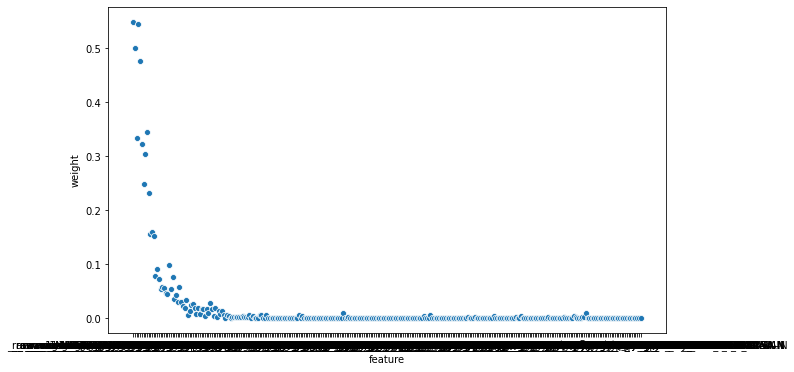

In [293]:
axn = sns.scatterplot(data=df_weight_per_feature, x="feature", y="weight")
plt.savefig(folder+'Feature.jpg', bbox_inches='tight')


In [323]:
folder = 'alternative/testing_seed/gbc1/'
std = 'StandardTestTrain_Summary.csv'
std_full = 'StandardTestTrain_Full.csv'
amine = 'LeaveOneOut_Summary.csv'

In [331]:
df_seed = pd.read_csv(folder + std)

In [332]:
df_seed.groupby('data_index').mean().drop('seed', axis=1)

,sample_fraction,precision_positive mean,recall_positive mean,f1_positive mean,matthewCoef mean,precision_positive std,recall_positive std,f1_positive std,matthewCoef std,precision_positive min,recall_positive min,f1_positive min,matthewCoef min,precision_positive max,recall_positive max,f1_positive max,matthewCoef max
data_index,,,,,,,,,,,,,,,,,
chem-only,1.0,0.801974,0.511369,0.624171,0.556944,0.023030,0.016640,0.005434,0.006285,0.785689,0.499603,0.620328,0.552500,0.818259,0.523135,0.628013,0.561388
exp-only,1.0,0.843163,0.498821,0.626665,0.572493,0.018773,0.013298,0.015713,0.019101,0.829889,0.489418,0.615555,0.558987,0.856438,0.508224,0.637776,0.586000
feat-only,1.0,0.559006,0.166148,0.243953,0.192877,0.055207,0.074557,0.090654,0.034156,0.519969,0.113428,0.179851,0.168725,0.598043,0.218868,0.308055,0.217029
